# Aprendizado de Máquina
__UFRJ-Macaé__

__Profa. Janaína Gomide__

## Reconhecendo Dígitos

Primeiro precisamos importar as bibliotecas que iremos utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import cluster

### 1 - Coletar os dados

Informações sobre o conjunto de dados:
1. O conjunto de dados se chama **'DigitsCollection.csv'** e seus elementos são separados por **vírgula** e não há elementos vazios
2. O conjunto de dados contém imagens em nível de cinza de **dígitos** manuscritos **de 0 a 9**
2. Cada imagem tem altura e largura de 28 pixels cada, totalizando **784 pixels**
3. Cada pixel tem um valor associado que vai de **0 a 255** (inclusivo), indicando o quão claro ou escuro é o pixel
4. O Banco de dados tem **785 colunas**, a primeira identifica a **classe** da imagem (se é 0,1,2,...) e as outras 784 correspondem aos seus pixels
5. Cada coluna de pixel tem um nome pixelX, onde X é um número de 0 a 783 (inclusivo).
6. Para localizar o pixel na imagem, basta considerar X = $i\times28+j$, onde $i$ e $j$ são inteiros de 0 a 27 (inclusivo). Então pixelX está na linha $i$ e coluna $j$ de uma matriz 28 x 28.
$$\begin{array}{rrrrrr}
0 & 1 & 2 & \dots & 26 & 27\\
28 & 29 & 30 & \dots & 54 & 55\\
56 & 57 & 58 & \dots & 82 & 83\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
728 & 729 & 730 & \dots & 754 & 755\\
756 & 757 & 758 & \dots & 782 & 783
\end{array}$$

In [2]:
conjuntoDados = pd.read_csv('DigitsCollection.csv',sep=',')
conjuntoDados.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2 - Explorar os dados

Vamos explorar algumas coisas no conjunto de dados:
1. Quantos exemplos o conjunto de dados possui?
2. Quantos exemplos cada classe possui?
3. Como são os dígitos que estamos tentando reconhecer?

In [3]:
#1. Quantos exemplos possui
conjuntoDados['label'].count()

4200

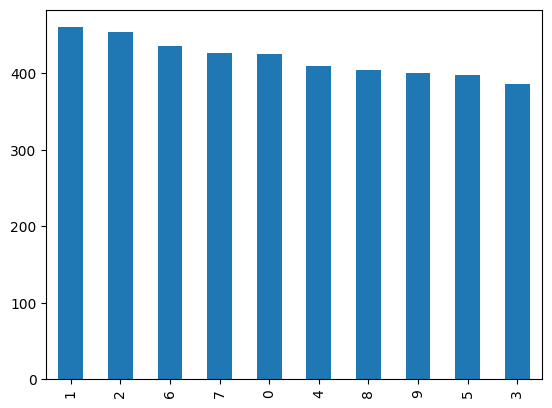

In [4]:
#2. Quantos exemplos cada classe possui
conjuntoDados.label.value_counts().plot(kind='bar');

In [5]:
pd.isnull(conjuntoDados).count(True)

0       785
1       785
2       785
3       785
4       785
       ... 
4195    785
4196    785
4197    785
4198    785
4199    785
Length: 4200, dtype: int64

In [6]:
#3. Visualizando os dígitos

#pegando um exemplo de cada dígito
exemplos = {}

for digito in range(10):
    for indice,linha in conjuntoDados.iterrows():
        if digito == linha['label']:
            vetorImg = np.zeros((1,784))
            j = 0
            for pixel in linha.keys()[1:]:
                vetorImg[0,j] = linha[pixel]
                j+=1
            matrizImg = vetorImg.reshape((28,28))
            break
    exemplos[digito] = matrizImg



### 3 - Construir/Escolher Modelo

Vamos usar o classificador *Support Vector Classifier* (SVC) e fazer separação linear

In [7]:
classificador = svm.SVC(kernel='linear')

### 4 - Treinar o Modelo

Primeiro vamos separar o conjunto de dados em dois: **80%** dos dados serão utilizados para o **treino** e **20%** para o **teste**

In [8]:
#Olhar a quantidade de dados e separar 80% para treino e 20% para teste 
tamanho = conjuntoDados['label'].count()
tamanhoTreino = int(tamanho*0.8) #80% para treino
tamanhoTeste = tamanho-tamanhoTreino
print('Tamanho do treino:',tamanhoTreino)
print('Tamanho do teste:',tamanhoTeste)

#Separar conjunto de treino e conjunto de teste
treinoFeatures,treinoClasses = conjuntoDados[conjuntoDados.columns[1:]].iloc[:tamanhoTreino],conjuntoDados[0:tamanhoTreino]['label'] 
testeFeatures,testeClasses = conjuntoDados[conjuntoDados.columns[1:]
                                          ].iloc[tamanhoTreino:],conjuntoDados[tamanhoTreino:]['label']

Tamanho do treino: 3360
Tamanho do teste: 840


Agora iremos treinar o classificador com os dados de treino

In [9]:
#Treina o classificador com os dados de treino
classificador.fit(treinoFeatures,treinoClasses)
testeFeatures.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3360,0,0,0,0,0,0,0,0,0,0,...,61,71,20,0,0,0,0,0,0,0
3361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5 - Testar e avaliar os resultados

In [10]:
#Usa o modelo criado para fazer a predição das classes para exemplos de teste
testePrevisao = classificador.predict(testeFeatures)

<AxesSubplot:>

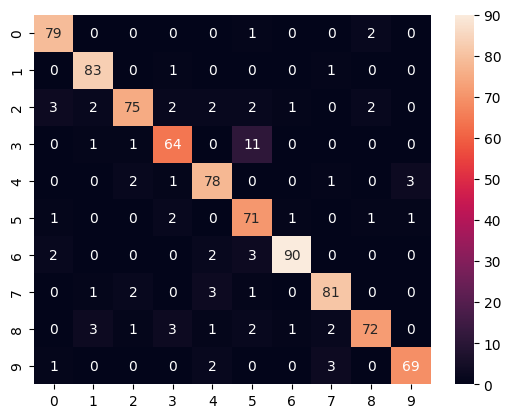

In [11]:
#Observa o resultado gerado pelo classificador
matrizConfusao = metrics.confusion_matrix(testeClasses,testePrevisao)
sns.heatmap(matrizConfusao, annot=True)

In [12]:
#Relatório de métricas
metricas = metrics.classification_report(testeClasses,testePrevisao)
print(metricas)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        82
           1       0.92      0.98      0.95        85
           2       0.93      0.84      0.88        89
           3       0.88      0.83      0.85        77
           4       0.89      0.92      0.90        85
           5       0.78      0.92      0.85        77
           6       0.97      0.93      0.95        97
           7       0.92      0.92      0.92        88
           8       0.94      0.85      0.89        85
           9       0.95      0.92      0.93        75

    accuracy                           0.91       840
   macro avg       0.91      0.91      0.91       840
weighted avg       0.91      0.91      0.91       840



### Experimento 2 - K-Means Clustering (Não Supervisionado)

In [13]:
estimador = cluster.KMeans(n_clusters=10)

treinoFeatures = conjuntoDados.iloc[:,1:]
clusters = estimador.fit_predict(treinoFeatures)
estimador.cluster_centers_.shape

(10, 784)

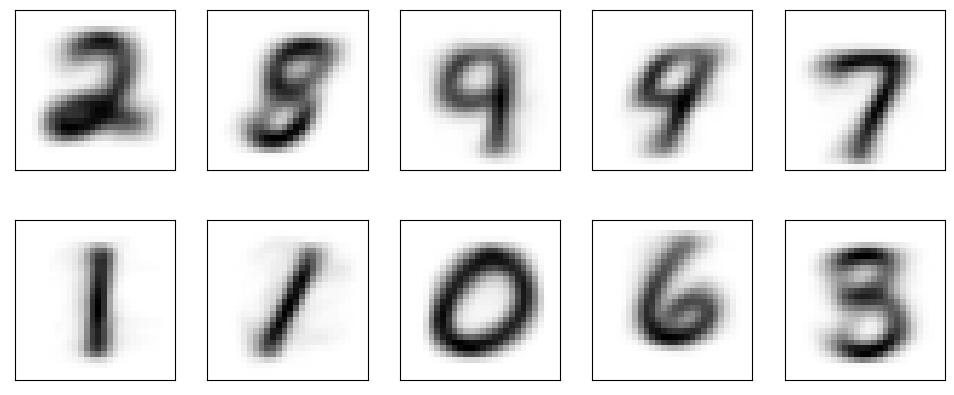

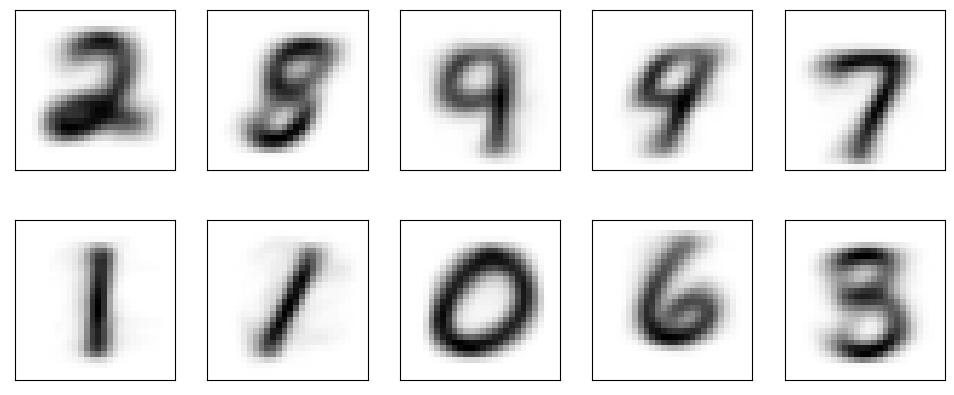

In [14]:
fig = plt.figure(figsize=(12,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(estimador.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
fig